In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [2]:
transactionData = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
customerData = pd.read_csv('QVI_purchase_behaviour.csv')

In [5]:
customerData

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


## Exploratory data analysis

In [6]:
transactionData.dtypes # helps to get data types of each column
transactionData.info() # used to check the data types and the null counts in columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
customerData.dtypes 
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
# Convert DATE to datetime format
transactionData["DATE"]=pd.to_datetime(transactionData["DATE"], origin = "1899-12-30",unit="D")

In [9]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [10]:
Counter(" ".join(transactionData["PROD_NAME"]).split()).most_common()

[('175g', 60561),
 ('Chips', 49770),
 ('150g', 41633),
 ('Kettle', 41288),
 ('&', 35565),
 ('Smiths', 28860),
 ('Salt', 27976),
 ('Cheese', 27890),
 ('Pringles', 25102),
 ('134g', 25102),
 ('Doritos', 24962),
 ('Crinkle', 23960),
 ('110g', 22387),
 ('Corn', 22063),
 ('Original', 21560),
 ('Cut', 20754),
 ('Chip', 18645),
 ('170g', 18502),
 ('Salsa', 18094),
 ('Chicken', 15407),
 ('165g', 15297),
 ('Sea', 14145),
 ('Thins', 14075),
 ('Sour', 13882),
 ('Crisps', 12607),
 ('330g', 12540),
 ('Vinegar', 12402),
 ('Chilli', 12389),
 ('300g', 12041),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('Supreme', 10963),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Popd', 9693),
 ('Tortilla', 9580),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Sensations', 9429),
 ('Old', 9324),
 ('El', 9324),
 ('Paso', 9324),
 ('Dip', 9324),
 ('Sweet', 7883),
 ('Lime', 7852),
 ('Tomato', 7669),
 ('Cream', 7618),
 ('Thinly', 7507),
 ('Tyrrells', 6442),
 ('380g', 6418),
 ('And', 6373),
 ('BBQ', 6351),
 ('Tangy', 6332),
 ('Grain',

In [11]:
# remove special character and then sort the distinct words by frequency of occurrence.
freq_df = transactionData.copy()
freq_df["PROD_NAME"] = freq_df["PROD_NAME"].str.replace(r'([0-9]+[gG])','')
freq_df["PROD_NAME"] = freq_df["PROD_NAME"].str.replace(r'([&])','')

In [12]:
freq_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/CreamOnion,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno,2,7.8


In [13]:
# remove salsa products
#transactionData = transactionData[~transactionData["PROD_NAME"].str.contains(r"[Ss]alsa")]
salsa_df = transactionData[transactionData['PROD_NAME'].str.contains('Salsa')].index

In [14]:
transactionData.drop(salsa_df, inplace=True) 

In [43]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


In [16]:
word_count = Counter(" ".join(freq_df["PROD_NAME"]).split()).most_common() #list object

In [17]:
pd.DataFrame.from_records(word_count)

,0,1
0,Chips,49770
1,Kettle,41288
2,Smiths,28860
3,Salt,27976
4,Cheese,27890
...,...,...
188,Frch/Onin,1432
189,Pc,1431
190,NCC,1419
191,Garden,1419


In [18]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [19]:
transactionData.describe(include=[object])

,PROD_NAME
count,246742
unique,105
top,Kettle Mozzarella Basil & Pesto 175g
freq,3304


#### Find Outlier
There's an outlier in PROD_QTY since the max is 200

In [20]:
# filter the transaction with PROD_QTY ==200
transactionData[transactionData['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [21]:
# Use a filter to see what other transactions that customer made.
transactionData[transactionData['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


The customer only has two transactions!

In [22]:
# remove this customer from dataframe
transactionData.drop(transactionData[transactionData['PROD_QTY']==200].index, inplace=True)

In [23]:
# check data summary again
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [24]:
# Create a summary of transaction count by date.
tran_date = transactionData.groupby('DATE').count()#.reset_index()
tran_date

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673


only 364 rows, one day is missing. 

In [25]:
pd.date_range(start = '2018-07-01', end = '2019-06-30' ).difference(tran_date.index)

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

The missing date is 2018-12-25

In [26]:
# join it onto the data to fill in the missing day.
#tran_date.loc['2018-12-25']=np.nan
tran_date.loc['2018-12-25'] = 0

In [27]:
tran_date = tran_date.reset_index().sort_values('DATE')

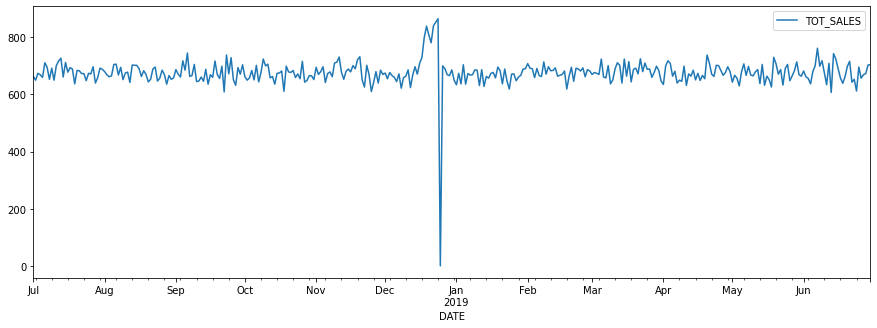

In [28]:
# Plot transactions over time
fig, ax = plt.subplots(figsize=(15,5))
#ax.plot(testDJan.day, testDJan.Sheets, color='tab:orange')
tran_date.plot(x='DATE', y='TOT_SALES', ax=ax)


Since Dec has an increase in purchases, we could zoom in it. and due to shops being closed on
Christmas day, 12/25 total sale is 0.

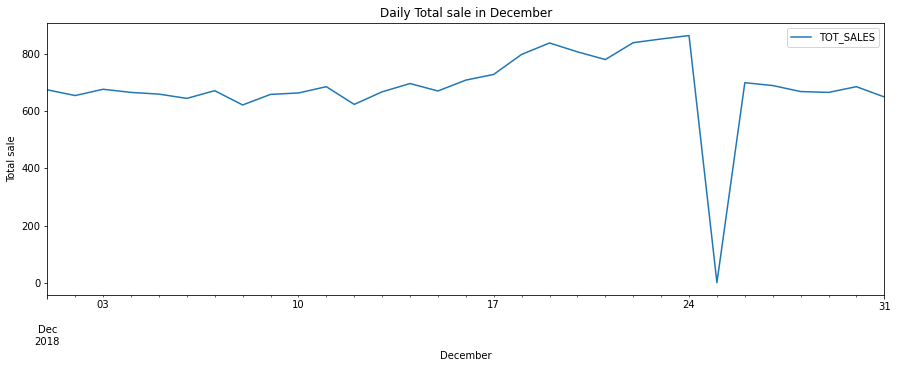

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))

# Add x-axis and y-axis
tran_date.plot(x='DATE', y='TOT_SALES', ax=ax)
# Set title and labels for axes
ax.set(xlabel="December",
       ylabel="Total sale",
       title="Daily Total sale in December",
       xlim=["2018-12-01", "2018-12-31"])
plt.show()

### Create pack size from PROD_NAME and plot. 

In [30]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [31]:
# creating features from pack size
transactionData["PROD_NAME"] = transactionData["PROD_NAME"].str.replace(r'[0-9]+(G)','g')
pack_sizes = transactionData["PROD_NAME"].str.extract(r'([0-9]+[gG])')[0].str.replace("g","").astype("float")
pack_sizes.describe()

count    240676.000000
mean        175.302286
std          60.014468
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: 0, dtype: float64

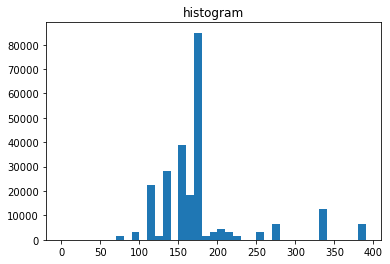

In [32]:
# Plot a histogram showing the number of transactions by pack size
plt.hist(pack_sizes, bins = np.arange(0, 400, 10)) 
plt.title("histogram") 
plt.show()

The largest size is 380g and the smallest size is 70g

### Now to create brands, we can use the first word in PROD_NAME to work out the brand name

In [33]:
transactionData["PROD_NAME"].str.split().str[0].value_counts().sort_index() # sort by index

Burger         1564
CCs            4551
Cheetos        2927
Cheezels       4603
Cobs           9693
Dorito         3183
Doritos       22041
French         1418
Grain          6272
GrnWves        1468
Infuzions     11057
Infzns         3144
Kettle        41288
NCC            1419
Natural        6050
Pringles      25102
RRD           11894
Red            4427
Smith          2963
Smiths        27390
Snbts          1576
Sunbites       1432
Thins         14075
Tostitos       9471
Twisties       9454
Tyrrells       6442
WW            10320
Woolworths     1516
Name: PROD_NAME, dtype: int64

In [34]:
# check brand names
[col for col in transactionData.PROD_NAME if 'RRD' in col]

['RRD Chilli&         Coconut 150g',
 'RRD Chilli&         Coconut 150g',
 'RRD Sweet Chilli &  Sour Cream 165g',
 'RRD Sweet Chilli &  Sour Cream 165g',
 'RRD Chilli&         Coconut 150g',
 'RRD Chilli&         Coconut 150g',
 'RRD Steak &         Chimuchurri 150g',
 'RRD Honey Soy       Chicken 165g',
 'RRD Salt & Vinegar  165g',
 'RRD Honey Soy       Chicken 165g',
 'RRD Chilli&         Coconut 150g',
 'RRD Sweet Chilli &  Sour Cream 165g',
 'RRD Salt & Vinegar  165g',
 'RRD Lime & Pepper   165g',
 'RRD Chilli&         Coconut 150g',
 'RRD Salt & Vinegar  165g',
 'RRD Salt & Vinegar  165g',
 'RRD SR Slow Rst     Pork Belly 150g',
 'RRD Honey Soy       Chicken 165g',
 'RRD Pc Sea Salt     165g',
 'RRD Steak &         Chimuchurri 150g',
 'RRD Lime & Pepper   165g',
 'RRD Pc Sea Salt     165g',
 'RRD Chilli&         Coconut 150g',
 'RRD Pc Sea Salt     165g',
 'RRD Salt & Vinegar  165g',
 'RRD Honey Soy       Chicken 165g',
 'RRD Sweet Chilli &  Sour Cream 165g',
 'RRD Honey Soy      

Some of the brand names look like they are of the same brands - <br>
1. Red and RRD
2. Grain and GrnWves
3. Infzns and Infuzions
4. Dorito and Doritos
5. NCC and Natural Chip Co 
6. Snbts and Sunbites
7. WW and Woolworths
8. Smith and Smiths

In [35]:
transactionData["BRAND"] = transactionData["PROD_NAME"].str.split().str[0]

In [36]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


In [37]:
def merge_brand_name(row):
    brand = row["BRAND"]  
    if brand in ['Red', 'RRD']:
        return 'Red Rock Deli'
    elif brand in ['GrnWves', 'Grain']:
        return 'Grain Waves'
    elif brand in ['Natural', 'NCC']:
        return 'Natural Chip Co'
    elif brand in ['Infzns', 'Infuzions']:
        return 'Infuzions'
    elif brand in ['Smith', 'Smiths']:
        return "Smiths"
    elif brand in ['Snbts', 'Sunbites']:
        return "Sunbites"
    elif brand in ['WW', 'Woolworths']:
        return "Woolworths"
    elif brand in ['Dorito', 'Doritos']:
        return 'Doritos'
    else:
        return brand

In [38]:
transactionData["BRAND"] = transactionData.apply(lambda row: merge_brand_name(row), axis=1) # too slow (maybe use other)

In [39]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos


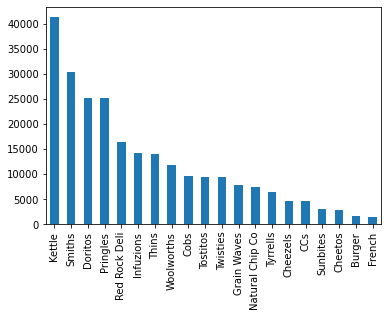

In [40]:
# Check the results look reasonable
transactionData['BRAND'].value_counts().plot(kind='bar') 

In [41]:
pd.set_option('display.max_rows', 10)

In [42]:
#